Hi, I tried out the fruits dataset with fastai.vision library. And the results are pretty good with 99.98% accuracy.

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

Current dataset directory is read-only; we might need to modify some training set data.
Moving to /tmp gives us Write permission on the folder.

In [2]:
cp -r /kaggle/input/fruits-360_dataset/ /tmp

In [3]:
path= '/tmp/fruits-360_dataset/fruits-360/'

Creating our databunch object. Fortunately this dataset uses imagenet style, so our factory method will suffice. We can experiment using different size values, I have found 224 to be optimal.

Fastai vision models are pretrained models on Imagenet. We are essentially using transfer learning here. So we should normalize our dateset using imagenet statistics as well.

In [4]:
test_folder='/tmp/fruits-360_dataset/fruits-360/Test'

In [5]:
src = (ImageList.from_folder(path)
       .split_by_rand_pct(valid_pct=0.2)
       .label_from_folder()
       .transform(get_transforms(), size=256)
       .add_test_folder(test_folder))

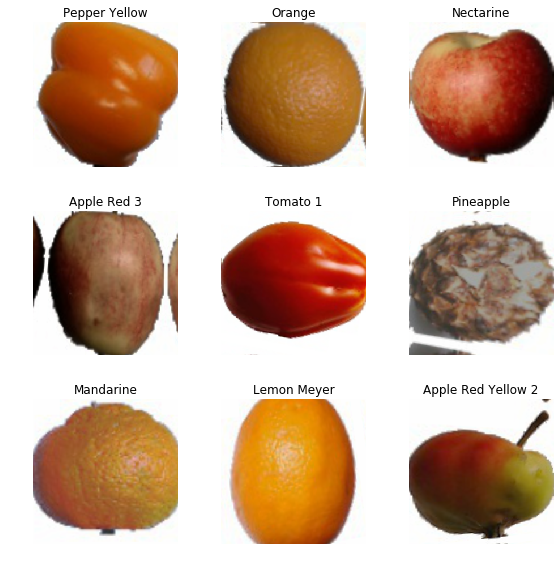

In [6]:
data = (src.databunch(bs=32)
        .normalize(imagenet_stats))

data.show_batch(rows=3,figsize=(8,8))

Now let's create our learner. I'm using resnet34 for now with accuracy as metric.
Resnet34 trains faster so let's go with that.

In [7]:
learner34=cnn_learner(data,models.resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 49326509.98it/s]


In [8]:
learner34.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.090098,0.007930,0.997961,11:00


99% Accuracy using resnet34 is great. We might be able to increase our accuracy even more with resent50.
Let's try that!

In [9]:
learner50=cnn_learner(data,models.resnet50,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:02, 41868161.06it/s]


Let's find our learning rate for resnet50 first. It's always a good idea to pass the learning rate while fitting.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


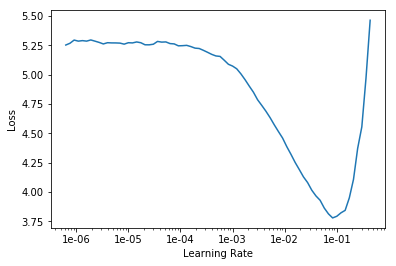

In [10]:
learner50.lr_find()
learner50.recorder.plot()

We have choose a maximum learning rate where the curve is most steep. So I've chosen 0.01 for this. Our CNN uses discriminative learning rate, so our max learning rate will be 0.01.

In [11]:
lr=1e-2

In [12]:
learner50.fit_one_cycle(4,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.130071,0.036056,0.991072,11:25


Results are quite good.

Now let's see which cases we failed.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


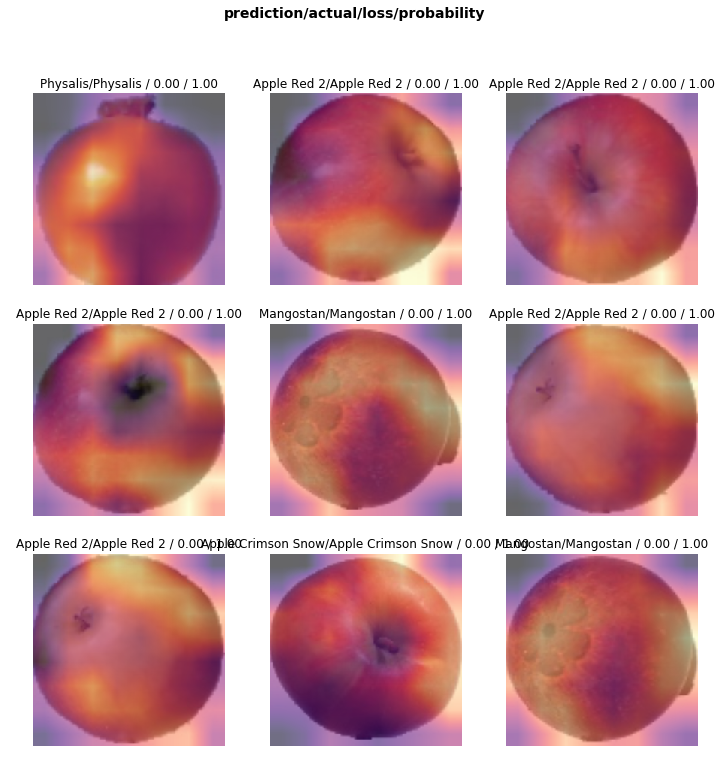

In [13]:
interp=ClassificationInterpretation.from_learner(learner50)
interp.plot_top_losses(9,figsize=(12,12))

In [14]:
interp.most_confused(min_val=1)

[]

In [15]:
learner50.export("/kaggle/working/fruitsmodel.pkl")

Thank you for sticking around.